In [1]:
import sys
import os
sys.path.insert (2, '/global/homes/s/salsum/luxsalsum/libNEST/libNESTShaun')
#sys.path.insert(2,'/global/projecta/projectdirs/lux/Tools/fastNEST/libNEST/')
import libNEST
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import matplotlib.pylab as pylab
pylab.rcParams["figure.figsize"]=15,8
import sys
import os
import functools
import scipy
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
from matplotlib.colors import LogNorm
import pickle
import math
import subprocess
import warnings

sys.path.insert(2, "/global/projecta/projectdirs/lux/data")
sys.path.insert(0,'/project/projectdirs/lux/Tools/LUXcode/Trunk/DataAnalysis/Python/' )
sys.path.insert(0,'/project/projectdirs/lux/Tools/LUXcode/Trunk/DataAnalysis/Python/aLib' )
import __init__ as S
import dp as dp
from scipy.optimize import OptimizeWarning

warnings.simplefilter("error", OptimizeWarning)
pylab.rcParams["figure.figsize"]=15,8
np.seterr(invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [2]:
minDrift = 30
maxDrift = 105
field = 283

In [3]:
g1 = .105
ee = .67
e_life = 1021
s2_thresh = 150
g1_gas = .089
ff = .67

In [4]:
NEST = libNEST.NEST(1,1,1.,2.88,-1)
myDetector = libNEST.Detector()

In [5]:
myDetector.LUXRun04PlanBSettings()
myDetector.
myDetector.g1 = g1
myDetector.ee = ee
myDetector.e_life = e_life
myDetector.dt_min
myDetector.g1_gas = g1_gas
myDetector.ff = ff

NEST.SetDetectorParameters(myDetector)
NEST.SetElectricField(field)
NEST.SetSingleElectron(False)

In [11]:
NEST.SetElectricField?


In [77]:
events =100000
numberfieldbin = 100
maxfield = 1000. #unit: V/cm
S1csl = np.zeros((events, numberfieldbin))
S2csl = np.zeros((events, numberfieldbin))
linE = np.linspace(0,maxfield,numberfieldbin,endpoint=False) 
recoilEnergy = np.zeros((events, numberfieldbin))
Efield = np.zeros((events, numberfieldbin))
for aa in range(events):
    energy = libNEST.TritiumEnergy()
    NEST.SetEnergy(energy)
    
    for ee in range(0,numberfieldbin): 
        NEST.SetElectricField(linE[ee])
        NEST.DetectorResponse()
        if (NEST.GetS1c() > 0) and (NEST.GetS2c() > 0):
            if (((np.log10(NEST.GetS1c())+0.7*np.log10(NEST.GetS2c()))<4.8)
               and ((np.log10(NEST.GetS1c())+0.7*np.log10(NEST.GetS2c()))>2.3)
               and ((np.log10(NEST.GetS1c())-2*np.log10(NEST.GetS2c()))<-5)
               and ((np.log10(NEST.GetS1c())-2*np.log10(NEST.GetS2c()))>-6.5)):
                S1csl[aa,ee]=NEST.GetS1c()
                S2csl[aa,ee]=NEST.GetS2c()
                recoilEnergy[aa,ee] = NEST.GetEnergy()
                Efield[aa,ee] = NEST.GetElectricField()

In [78]:
linE


array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.,  110.,  120.,  130.,  140.,  150.,  160.,  170.,
        180.,  190.,  200.,  210.,  220.,  230.,  240.,  250.,  260.,
        270.,  280.,  290.,  300.,  310.,  320.,  330.,  340.,  350.,
        360.,  370.,  380.,  390.,  400.,  410.,  420.,  430.,  440.,
        450.,  460.,  470.,  480.,  490.,  500.,  510.,  520.,  530.,
        540.,  550.,  560.,  570.,  580.,  590.,  600.,  610.,  620.,
        630.,  640.,  650.,  660.,  670.,  680.,  690.,  700.,  710.,
        720.,  730.,  740.,  750.,  760.,  770.,  780.,  790.,  800.,
        810.,  820.,  830.,  840.,  850.,  860.,  870.,  880.,  890.,
        900.,  910.,  920.,  930.,  940.,  950.,  960.,  970.,  980.,  990.])

In [79]:
S1csl

array([[ 16.89181838,  20.42884565,  13.47787897, ...,  13.52790295,
         14.45856618,  10.74310706],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 13.35481951,  11.51010842,   5.86802894, ...,   9.88270644,
         19.38805037,   4.58891663],
       ..., 
       [  8.54135995,   8.7078389 ,  10.89821314, ...,   3.04303714,
          7.74803246,   2.47738725],
       [ 13.9922545 ,   9.05075718,  13.87483028, ...,  10.51490854,
          7.93173633,  11.59950367],
       [  0.        ,  44.82105868,  36.69253084, ...,  48.19834247,
         32.31317831,  48.97726037]])

In [80]:
np.sum(S1csl,axis=0)


array([ 2698775.03550051,  2722681.65613455,  2665860.17939329,
        2619703.10215754,  2588308.02807981,  2563209.13299601,
        2536391.11027688,  2514388.93835339,  2496511.98556095,
        2479295.82473913,  2463405.13351523,  2451613.63963648,
        2430865.93737041,  2423317.15214221,  2410771.51643312,
        2399777.67399428,  2388340.91050243,  2379349.81516058,
        2371186.25974683,  2359620.38764961,  2353062.31532012,
        2343738.31749685,  2338343.47828934,  2327516.63737976,
        2319485.25049114,  2315804.37877001,  2307159.24890569,
        2299707.23312688,  2295505.90800779,  2287338.95484865,
        2284184.83715851,  2277400.7016682 ,  2270308.3414237 ,
        2264561.14042328,  2258281.70825634,  2257262.5746206 ,
        2245055.47173186,  2242134.58543319,  2238721.5147629 ,
        2230438.41064582,  2225453.02999787,  2224584.07179415,
        2219420.34446031,  2214654.12826045,  2213779.60419742,
        2206136.7604882 ,  2202449.48456

In [81]:
np.sum(recoilEnergy,axis=0)

array([ 522118.75263959,  553269.89726061,  556508.20427078,
        557380.69914997,  557662.18548796,  557782.41330573,
        557858.38516569,  557711.58046839,  557796.68487477,
        557824.34072936,  557561.33355123,  557846.43135643,
        557718.89669764,  557566.65028599,  557679.84648606,
        557641.7406536 ,  557450.12141207,  557671.38038313,
        557533.80358666,  557534.99691063,  557295.17405763,
        557555.59825718,  557447.07559878,  557301.80496925,
        557231.15833279,  557311.93065804,  557322.56848145,
        557181.09099579,  557192.87581417,  557150.58402637,
        557057.41526675,  556955.64294225,  557083.49786374,
        556859.82966846,  556724.35875574,  556816.99828157,
        556716.78533512,  556559.04396906,  556688.12108788,
        556336.8056331 ,  556163.447184  ,  556253.05414495,
        556003.15224087,  556371.41717178,  556094.4877294 ,
        555760.51557872,  555952.55758056,  555698.44475448,
        555583.18837395,

In [88]:
S1csl

array([[ 16.89181838,  20.42884565,  13.47787897, ...,  13.52790295,
         14.45856618,  10.74310706],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 13.35481951,  11.51010842,   5.86802894, ...,   9.88270644,
         19.38805037,   4.58891663],
       ..., 
       [  8.54135995,   8.7078389 ,  10.89821314, ...,   3.04303714,
          7.74803246,   2.47738725],
       [ 13.9922545 ,   9.05075718,  13.87483028, ...,  10.51490854,
          7.93173633,  11.59950367],
       [  0.        ,  44.82105868,  36.69253084, ...,  48.19834247,
         32.31317831,  48.97726037]])

In [118]:
S1csl[np.where(S1csl>0)]/recoilEnergy[np.where(S1csl>0)]

array([ 4.39455836,  5.31474779,  3.50639134, ...,  4.841815  ,
        3.24605419,  4.92006202])

In [103]:
len(Efield[np.where(S1csl>0)])

8696893

In [110]:
#define a funtion do band's mean value and sigma calculation
def f(x, a, b, c):
    return a * np.exp(-(x - b)**2.0 / (2 * c**2))

def bandfit(x, y, bins=10, range=None, normed=False, weights=None):
    H, xedges,yedges = np.histogram2d(x, y, bins, range, normed, weights)
    log10xlist=[]
    mu=[]
    sigma=[]
    for ii in xrange(0,xedges.shape[0]-1):
        try:
            log10y = [0.5 * (yedges[i] + yedges[i+1]) for i in xrange(yedges.shape[0]-1)]
            Hx = H[ii,:]
            popt, pcov = sp.optimize.curve_fit(f, log10y, Hx)
            log10xlist.append(0.5 * (xedges[ii] + xedges[ii+1]))
            mu.append(popt[1])
            sigma.append(popt[2])
        except BaseException:
            print "Fitting data in bin ",ii,"failed."
    return(np.array(mu),np.abs(sigma),np.array(log10xlist))

In [127]:
bandfits=bandfit(Efield[np.where(S1csl>0)],S1csl[np.where(S1csl>0)]/recoilEnergy[np.where(S1csl>0)],range=[[-5,995],[0,8]],bins=(100,100))

In [132]:
bandfitsenergy=bandfit(recoilEnergy[np.where(S1csl>0)],S1csl[np.where(S1csl>0)]/recoilEnergy[np.where(S1csl>0)],range=[[-5,995],[0,8]],bins=(100,100))

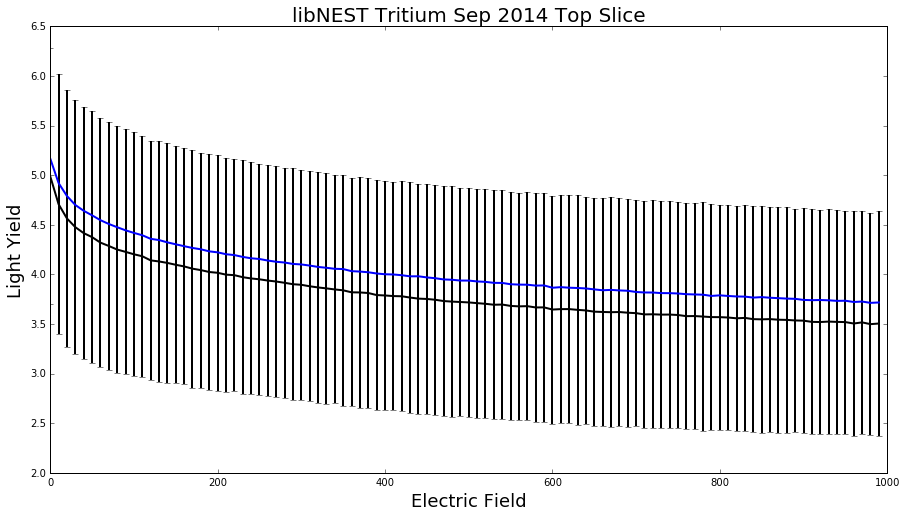

In [129]:
ax = plt.figure(1)

plt.errorbar(bandfits[2],bandfits[0],bandfits[1],lw=2, color="k",label="gaussian fit bins")
plt.plot(linE, np.sum(S1csl,axis=0)/np.sum(recoilEnergy,axis=0),lw=2, color="b",label="average bins")
plt.xlabel("Electric Field", fontsize=18)
plt.ylabel("Light Yield", fontsize=18)
plt.title("libNEST Tritium Sep 2014 Top Slice", fontsize=20)

In [130]:
np.save("LinE",linE)

In [133]:
np.save("LY",np.sum(S1csl,axis=0)/np.sum(recoilEnergy,axis=0))
np.save("LYgaussian",bandfits)
np.save("LYenergygaussian",bandfitsenergy)

In [66]:
np.sum(S1csl,axis=0)/np.sum(recoilEnergy,axis=0)

array([ 5.16977978,  4.78997446,  4.64192693,  4.54566785,  4.47630014,
        4.41387915,  4.36429208,  4.32243767,  4.28139649,  4.25214302,
        4.22309363,  4.19420852,  4.16746029,  4.14201415,  4.11507011,
        4.09536106,  4.07867397,  4.06070339,  4.03533117,  4.02300186,
        4.00299576,  3.99510524,  3.97399358,  3.95959386,  3.94299095,
        3.93261263,  3.91477754,  3.91200272,  3.89875342,  3.89064275,
        3.88262622,  3.86261018,  3.85607986,  3.84800428,  3.83927907,
        3.82786406,  3.81846073,  3.81046369,  3.79927544,  3.79791526,
        3.78120693,  3.78105154,  3.7709768 ,  3.76733687,  3.75877684,
        3.74701934,  3.74224563,  3.73722328,  3.72237055,  3.72022261])

In [68]:
ly =np.load("LY.npy")
ly

array([ 5.16977978,  4.78997446,  4.64192693,  4.54566785,  4.47630014,
        4.41387915,  4.36429208,  4.32243767,  4.28139649,  4.25214302,
        4.22309363,  4.19420852,  4.16746029,  4.14201415,  4.11507011,
        4.09536106,  4.07867397,  4.06070339,  4.03533117,  4.02300186,
        4.00299576,  3.99510524,  3.97399358,  3.95959386,  3.94299095,
        3.93261263,  3.91477754,  3.91200272,  3.89875342,  3.89064275,
        3.88262622,  3.86261018,  3.85607986,  3.84800428,  3.83927907,
        3.82786406,  3.81846073,  3.81046369,  3.79927544,  3.79791526,
        3.78120693,  3.78105154,  3.7709768 ,  3.76733687,  3.75877684,
        3.74701934,  3.74224563,  3.73722328,  3.72237055,  3.72022261])

In [135]:

NEST.GetXeDensity()



2.880000114440918